In [2]:
###### load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler, StandardScaler # min/max scaling
import pickle
import seaborn as sns
from matplotlib.colors import LogNorm
from MAPseq_processing import * # import all functions from this script
from MAPseq_plotting import * # import all functions from this script
import matplotlib.lines as mlines # needed for custom legend
from scipy import stats
import random

# import metadata
from M194_M220_metadata import *

# import colormaps
from colormaps import blue_cmp, orange_cmp

%matplotlib inline

# auto refreshes imported functions if source code changes:
%load_ext autoreload
%autoreload 2


In [3]:

# set-up variables
in_path = '/Volumes/Data/Emily/MAPseq/combined_analysis_M194_M220/processed_data/'
out_path = '/Volumes/Data/Emily/figures/fig_2_mapseq/python_out/'

#### load data
with open(in_path +'M194_M220_OMC_bin4.pkl', 'rb') as f:
    omc_bin = pickle.load(f)   

#### load data
with open(in_path +'M194_M220_OMC_countN4.pkl', 'rb') as f:
    omc_countN = pickle.load(f)

# Data Processing

In [4]:
# initial processing
# bin processing
omc_clean = [clean_up_data(df) for df in omc_bin]
omc_type = [sort_by_celltype(df) for df in omc_clean]




# Stacked Bar Charts

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


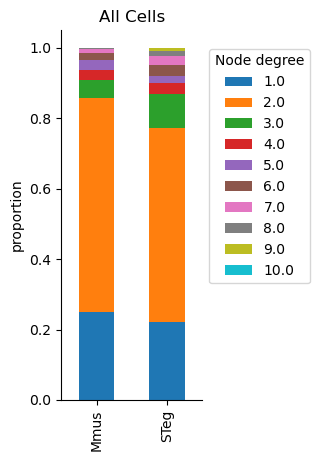

In [23]:
# all cells
mm_idx = metadata[metadata["species"]=="MMus"].index.values
st_idx = metadata[metadata["species"]=="STeg"].index.values

mm_all = pd.concat(np.take(omc_type, mm_idx))
st_all = pd.concat(np.take(omc_type, st_idx))
mm_meta = {"mice":["ALL"], "species":["MMus"], "dataset":["ALL"]}
st_meta = {"mice":["ALL"], "species":["STeg"], "dataset":["ALL"]}

mm_nodes = dfs_to_node_proportions([mm_all], meta=mm_meta)
st_nodes = dfs_to_node_proportions([st_all], meta=st_meta)

all_nodes = pd.concat([mm_nodes, st_nodes])

proportion_node_stacked_bars(all_nodes, title="All Cells")



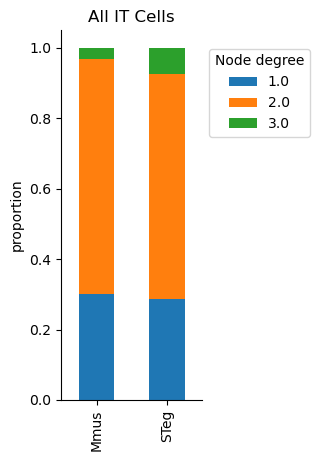

In [25]:
# IT cells
mm_it = mm_all[mm_all['type']=="IT"]
st_it = st_all[st_all['type']=="IT"]

mm_nodes = dfs_to_node_proportions([mm_it], meta=mm_meta)
st_nodes = dfs_to_node_proportions([st_it], meta=st_meta)

all_nodes = pd.concat([mm_nodes, st_nodes])

proportion_node_stacked_bars(all_nodes, title="All IT Cells")



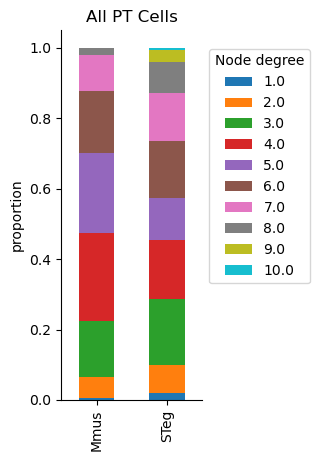

In [27]:
# PT cells
mm_pt = mm_all[mm_all['type']=="PT"]
st_pt = st_all[st_all['type']=="PT"]

mm_nodes = dfs_to_node_proportions([mm_pt], meta=mm_meta)
st_nodes = dfs_to_node_proportions([st_pt], meta=st_meta)

all_nodes = pd.concat([mm_nodes, st_nodes])

proportion_node_stacked_bars(all_nodes, title="All PT Cells")



# P(A|B)

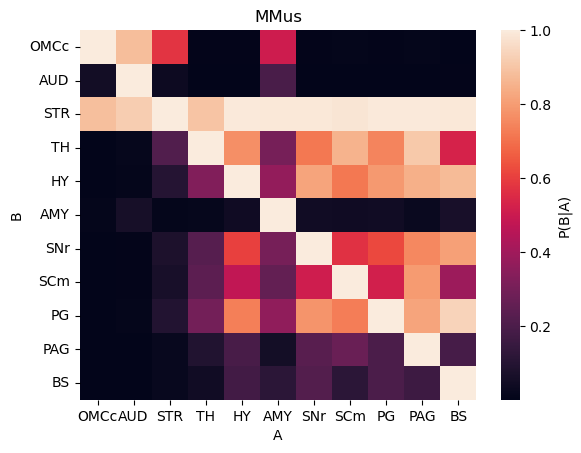

In [52]:
mm_pab, areas = calc_PAB(mm_all)
pab_heatmap(mm_pab, areas, title="MMus")
plt.show()

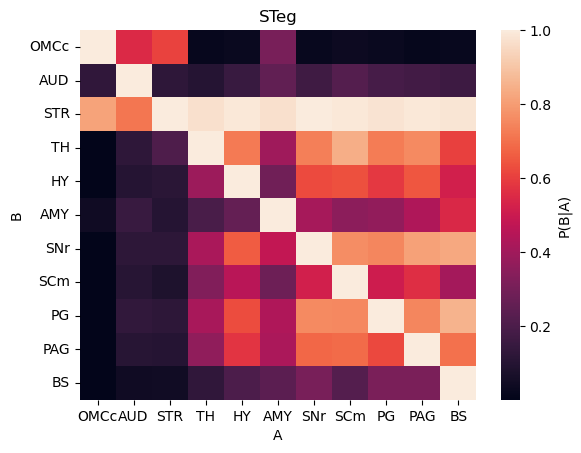

In [53]:
st_pab, areas = calc_PAB(st_all)
pab_heatmap(st_pab, areas, title="STeg")
plt.show()

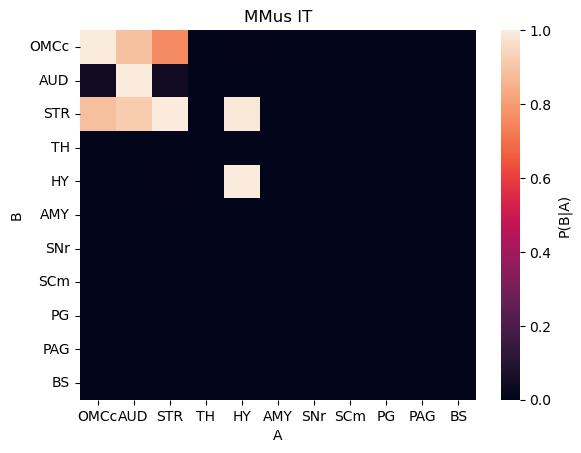

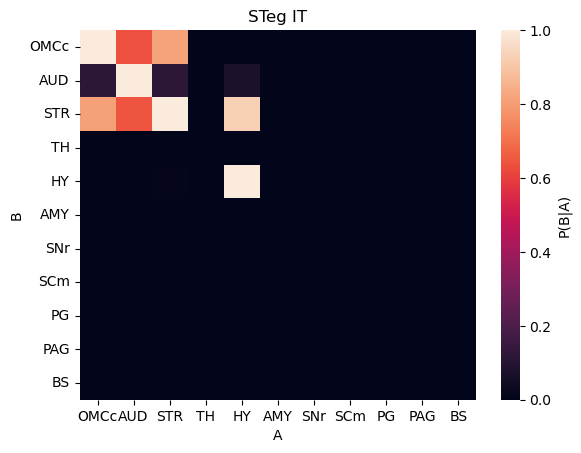

In [63]:
# IT

mm_it = mm_all[mm_all['type']=="IT"]
mm_pab, areas = calc_PAB(mm_it)
pab_heatmap(mm_pab, areas, title="MMus IT")
plt.show()

st_it = st_all[st_all['type']=="IT"]
st_pab, areas = calc_PAB(st_it)
pab_heatmap(st_pab, areas, title="STeg IT")
plt.show()

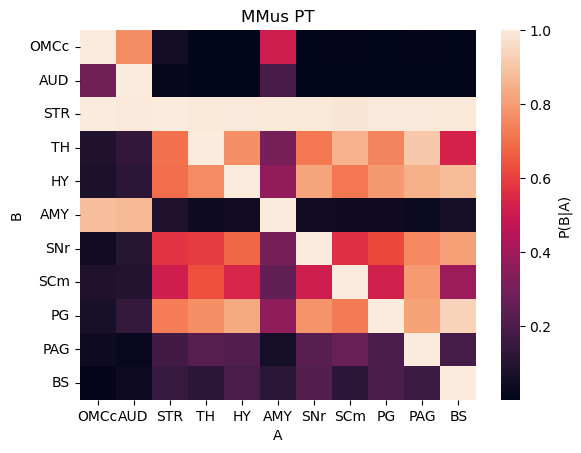

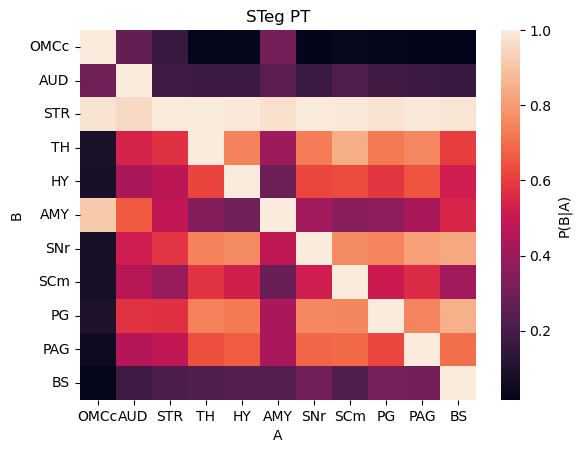

In [56]:
# PT
mm_pab, areas = calc_PAB(mm_pt)
pab_heatmap(mm_pab, areas, title="MMus PT")
plt.show()

st_pab, areas = calc_PAB(st_pt)
pab_heatmap(st_pab, areas, title="STeg PT")
plt.show()

# motif analysis

## IT cells

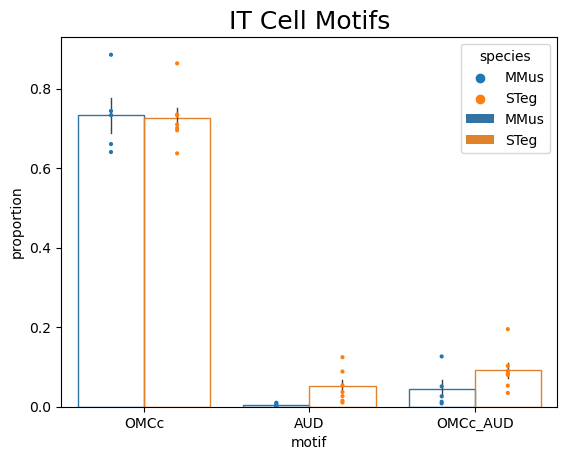

In [78]:
# IT motifs
# OMCc, AUD, OMCc + AUD
# disregard STR projections

df_list = [df[df["type"]=="IT"] for df in omc_type]
plot_df = pd.DataFrame(columns=["motif", "proportion", "count", "total", "mice", "species", "dataset"])

for i in range(len(df_list)):
    df = df_list[i]
    omcc = ((df['OMCc']==1) & (df['AUD']==0)).sum()
    aud = ((df['OMCc']==0) & (df['AUD']==1)).sum()
    omcc_aud = ((df['OMCc']==1) & (df['AUD']==1)).sum()
    total = df.shape[0]
    int_df = pd.DataFrame({'motif':["OMCc", "AUD", "OMCc_AUD"], 'proportion':[omcc/total, aud/total, omcc_aud/total],
                      'count':[omcc,aud,omcc_aud], 'total':total, 'mice':mice[i], 
                      'species':species[i], 'dataset':dataset[i]})
    plot_df = pd.concat([plot_df, int_df])


# dot bar plot
dot_bar_plot(plot_df, title="IT Cell Motifs", xaxis="motif", yaxis="proportion", hueaxis="species")
plt.show()


## PT/PAG motifs

OMCi                                                432.0
OMCc                                                  7.0
AUD                                                  76.0
STR                                                 428.0
TH                                                  326.0
HY                                                  280.0
AMY                                                 187.0
SNr                                                 351.0
SCm                                                 242.0
PG                                                  323.0
PAG                                                 432.0
BS                                                  134.0
type    PTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPT...
dtype: object


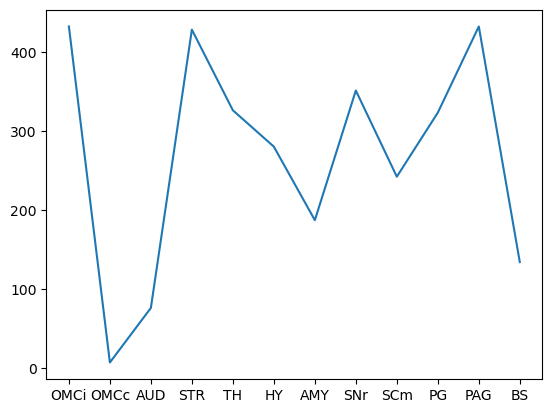

In [89]:
st_pag = st_pt[st_pt['PAG']==1]
print(st_pag.sum())
plt.plot(st_pag.sum()[:-1])

OMCi                                               1490.0
OMCc                                                 16.0
AUD                                                   4.0
STR                                                1483.0
TH                                                 1354.0
HY                                                 1258.0
AMY                                                  39.0
SNr                                                1122.0
SCm                                                1185.0
PG                                                 1217.0
PAG                                                1490.0
BS                                                  241.0
type    PTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPTPT...
dtype: object


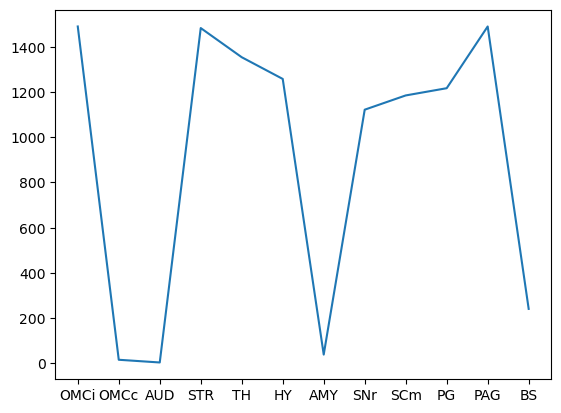

In [91]:
mm_pag = mm_pt[mm_pt['PAG']==1]
print(mm_pag.sum())
plt.plot(mm_pag.sum()[:-1])

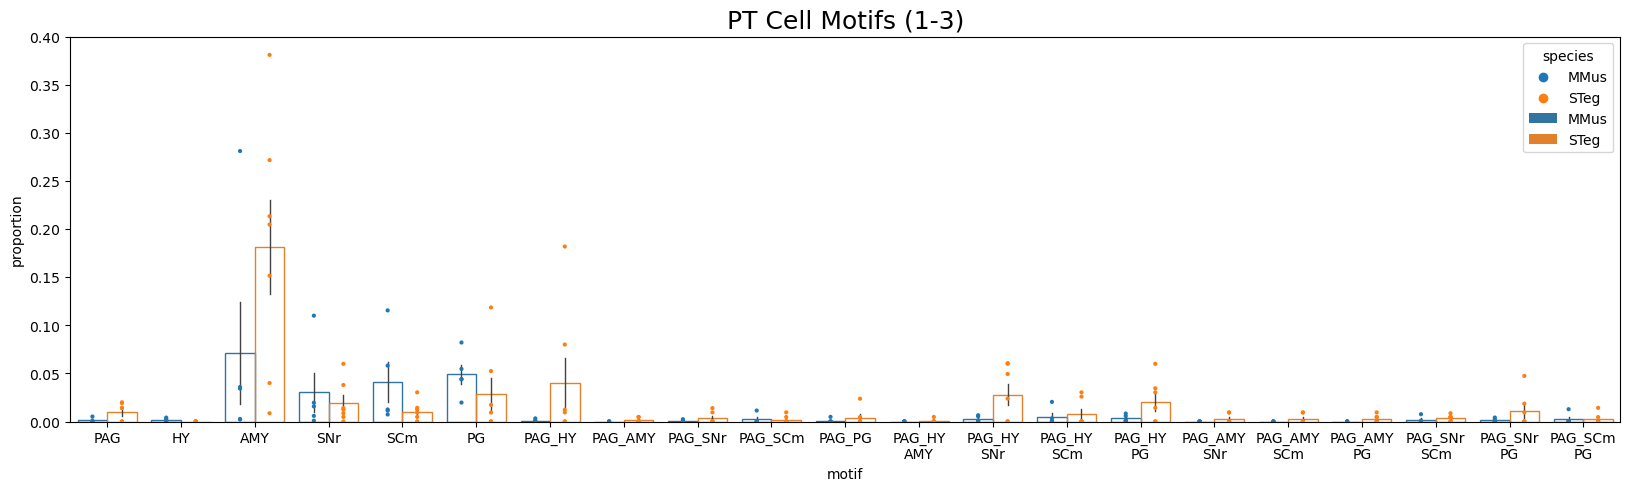

In [119]:
df_list = [df[df["type"]=="PT"] for df in omc_type]
df_list = [df.drop(['OMCi', 'OMCc', 'AUD', 'STR', 'TH', 'BS', 'type'], axis=1) for df in df_list]
plot_df = pd.DataFrame(columns=["motif", "proportion", "count", "total", "mice", "species", "dataset"])


for i in range(len(df_list)):
    df = df_list[i]
    total = df.shape[0]

    # degree 1
    idx1 = df.sum(axis=1) == 1
    df_1 = df[idx1]
    pag = (df_1["PAG"]==1).sum()
    hy = (df_1["HY"]==1).sum()
    amy = (df_1["AMY"]==1).sum()
    snr = (df_1["SNr"]==1).sum()
    scm = (df_1["SCm"]==1).sum()
    pg = (df_1["PG"]==1).sum()
    int_df = pd.DataFrame({'motif':["PAG", "HY","AMY", "SNr", "SCm", "PG"], 
                           'proportion':[pag/total, hy/total, amy/total, snr/total, scm/total, pg/total],
                      'count':[pag,hy,amy,snr,scm,pg], 'total':total, 'mice':mice[i], 
                      'species':species[i], 'dataset':dataset[i]})
    plot_df = pd.concat([plot_df, int_df])

    # degree 2
    idx2 = df.sum(axis=1) == 2
    df_2 = df[idx2]
    pag_hy = ((df_2["PAG"]==1) & df_2["HY"]==1).sum()
    pag_amy = ((df_2["PAG"]==1) & df_2["AMY"]==1).sum()
    pag_snr = ((df_2["PAG"]==1) & df_2["SNr"]==1).sum()
    pag_scm = ((df_2["PAG"]==1) & df_2["SCm"]==1).sum()
    pag_pg = ((df_2["PAG"]==1) & df_2["PG"]==1).sum()
    int_df = pd.DataFrame({'motif':["PAG_HY", "PAG_AMY", "PAG_SNr", "PAG_SCm", "PAG_PG"], 
                           'proportion':[pag_hy/total, pag_amy/total,pag_snr/total, pag_scm/total, pag_pg/total],
                      'count':[pag_hy, pag_amy, pag_snr, pag_scm, pag_pg], 'total':total, 'mice':mice[i], 
                      'species':species[i], 'dataset':dataset[i]})
    plot_df = pd.concat([plot_df, int_df])

    # degree 3
    idx3 = df.sum(axis=1) == 3
    df_3 = df[idx3]
    pag_hy_amy = ((df_3["PAG"]==1) & (df_3["HY"]==1) & (df_3["AMY"]==1)).sum()
    pag_hy_snr = ((df_3["PAG"]==1) & (df_3["HY"]==1) & (df_3["SNr"]==1)).sum()
    pag_hy_scm = ((df_3["PAG"]==1) & (df_3["HY"]==1) & (df_3["SCm"]==1)).sum()
    pag_hy_pg = ((df_3["PAG"]==1) & (df_3["HY"]==1) & (df_3["PG"]==1)).sum()
    pag_amy_snr = ((df_3["PAG"]==1) & (df_3["AMY"]==1) & (df_3["SNr"]==1)).sum()
    pag_amy_scm = ((df_3["PAG"]==1) & (df_3["AMY"]==1) & (df_3["SCm"]==1)).sum()
    pag_amy_pg = ((df_3["PAG"]==1) & (df_3["AMY"]==1) & (df_3["PG"]==1)).sum()
    pag_snr_scm = ((df_3["PAG"]==1) & (df_3["SNr"]==1) & (df_3["SCm"]==1)).sum()
    pag_snr_pg = ((df_3["PAG"]==1) & (df_3["SNr"]==1) & (df_3["PG"]==1)).sum()
    pag_scm_pg = ((df_3["PAG"]==1) & (df_3["SCm"]==1) & (df_3["PG"]==1)).sum()
    int_df = pd.DataFrame({'motif':["PAG_HY\nAMY", "PAG_HY\nSNr", "PAG_HY\nSCm", "PAG_HY\nPG",
                                    "PAG_AMY\nSNr", "PAG_AMY\nSCm", "PAG_AMY\nPG", 
                                    "PAG_SNr\nSCm", "PAG_SNr\nPG", "PAG_SCm\nPG"], 
                           'proportion':[pag_hy_amy/total, pag_hy_snr/total, pag_hy_scm/total, pag_hy_pg/total, 
                                         pag_amy_snr/total, pag_amy_snr/total, pag_amy_pg/total, 
                                         pag_snr_scm/total, pag_snr_pg/total, pag_scm_pg/total],
                            'count':[pag_hy_amy, pag_hy_snr, pag_hy_scm, pag_hy_pg, pag_amy_snr, 
                               pag_amy_scm, pag_amy_pg, pag_snr_scm, pag_snr_pg, pag_scm_pg],
                            'total':total, 'mice':mice[i], 
                            'species':species[i], 'dataset':dataset[i]})
    plot_df = pd.concat([plot_df, int_df])


# dot bar plot
plt.figure(figsize=(20,5))
dot_bar_plot(plot_df, title="PT Cell Motifs (1-3)", xaxis="motif", yaxis="proportion", hueaxis="species")
plt.show()



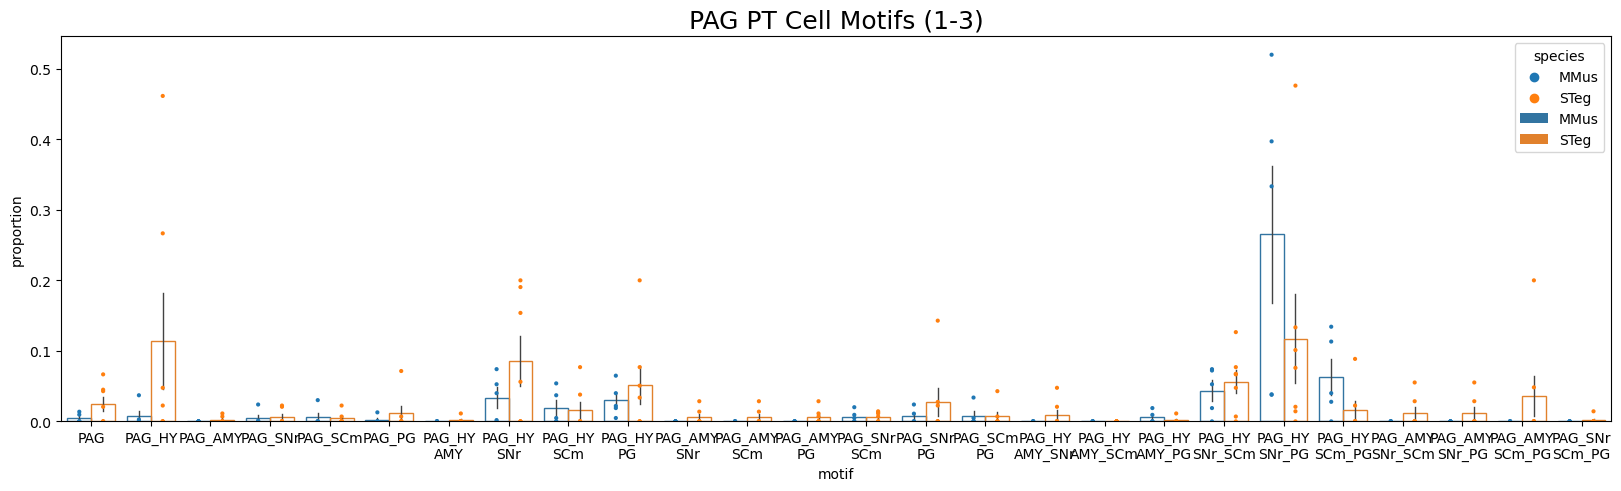

In [11]:
df_pt = [df[df["type"]=="PT"] for df in omc_type]
df_pag = [df[df["PAG"]==1] for df in df_pt]
df_list = [df.drop(['OMCi', 'OMCc', 'AUD', 'STR', 'TH', 'BS', 'type'], axis=1) for df in df_pag]
plot_df = pd.DataFrame(columns=["motif", "proportion", "count", "total", "mice", "species", "dataset"])


for i in range(len(df_list)):
    df = df_list[i]
    total = df.shape[0]

    # degree 1
    idx1 = df.sum(axis=1) == 1
    df_1 = df[idx1]
    pag = (df_1["PAG"]==1).sum()
    # hy = (df_1["HY"]==1).sum()
    # amy = (df_1["AMY"]==1).sum()
    # snr = (df_1["SNr"]==1).sum()
    # scm = (df_1["SCm"]==1).sum()
    # pg = (df_1["PG"]==1).sum()
    int_df = pd.DataFrame({'motif':["PAG"], 
                           'proportion':[pag/total],
                      'count':[pag], 'total':total, 'mice':mice[i], 
                      'species':species[i], 'dataset':dataset[i]})
    plot_df = pd.concat([plot_df, int_df])

    # degree 2
    idx2 = df.sum(axis=1) == 2
    df_2 = df[idx2]
    pag_hy = ((df_2["PAG"]==1) & df_2["HY"]==1).sum()
    pag_amy = ((df_2["PAG"]==1) & df_2["AMY"]==1).sum()
    pag_snr = ((df_2["PAG"]==1) & df_2["SNr"]==1).sum()
    pag_scm = ((df_2["PAG"]==1) & df_2["SCm"]==1).sum()
    pag_pg = ((df_2["PAG"]==1) & df_2["PG"]==1).sum()
    int_df = pd.DataFrame({'motif':["PAG_HY", "PAG_AMY", "PAG_SNr", "PAG_SCm", "PAG_PG"], 
                           'proportion':[pag_hy/total, pag_amy/total,pag_snr/total, pag_scm/total, pag_pg/total],
                      'count':[pag_hy, pag_amy, pag_snr, pag_scm, pag_pg], 'total':total, 'mice':mice[i], 
                      'species':species[i], 'dataset':dataset[i]})
    plot_df = pd.concat([plot_df, int_df])

    # degree 3
    idx3 = df.sum(axis=1) == 3
    df_3 = df[idx3]
    pag_hy_amy = ((df_3["PAG"]==1) & (df_3["HY"]==1) & (df_3["AMY"]==1)).sum()
    pag_hy_snr = ((df_3["PAG"]==1) & (df_3["HY"]==1) & (df_3["SNr"]==1)).sum()
    pag_hy_scm = ((df_3["PAG"]==1) & (df_3["HY"]==1) & (df_3["SCm"]==1)).sum()
    pag_hy_pg = ((df_3["PAG"]==1) & (df_3["HY"]==1) & (df_3["PG"]==1)).sum()
    pag_amy_snr = ((df_3["PAG"]==1) & (df_3["AMY"]==1) & (df_3["SNr"]==1)).sum()
    pag_amy_scm = ((df_3["PAG"]==1) & (df_3["AMY"]==1) & (df_3["SCm"]==1)).sum()
    pag_amy_pg = ((df_3["PAG"]==1) & (df_3["AMY"]==1) & (df_3["PG"]==1)).sum()
    pag_snr_scm = ((df_3["PAG"]==1) & (df_3["SNr"]==1) & (df_3["SCm"]==1)).sum()
    pag_snr_pg = ((df_3["PAG"]==1) & (df_3["SNr"]==1) & (df_3["PG"]==1)).sum()
    pag_scm_pg = ((df_3["PAG"]==1) & (df_3["SCm"]==1) & (df_3["PG"]==1)).sum()
    int_df = pd.DataFrame({'motif':["PAG_HY\nAMY", "PAG_HY\nSNr", "PAG_HY\nSCm", "PAG_HY\nPG",
                                    "PAG_AMY\nSNr", "PAG_AMY\nSCm", "PAG_AMY\nPG", 
                                    "PAG_SNr\nSCm", "PAG_SNr\nPG", "PAG_SCm\nPG"], 
                           'proportion':[pag_hy_amy/total, pag_hy_snr/total, pag_hy_scm/total, pag_hy_pg/total, 
                                         pag_amy_snr/total, pag_amy_snr/total, pag_amy_pg/total, 
                                         pag_snr_scm/total, pag_snr_pg/total, pag_scm_pg/total],
                            'count':[pag_hy_amy, pag_hy_snr, pag_hy_scm, pag_hy_pg, pag_amy_snr, 
                               pag_amy_scm, pag_amy_pg, pag_snr_scm, pag_snr_pg, pag_scm_pg],
                            'total':total, 'mice':mice[i], 
                            'species':species[i], 'dataset':dataset[i]})
    plot_df = pd.concat([plot_df, int_df])

    # degree 4
    idx4 = df.sum(axis=1) == 4
    df_4 = df[idx4]
    pag_hy_amy_snr = ((df_4["PAG"]==1) & (df_4["HY"]==1) & (df_4["AMY"]==1) & (df_4["SNr"]==1)).sum()
    pag_hy_amy_scm = ((df_4["PAG"]==1) & (df_4["HY"]==1) & (df_4["AMY"]==1) & (df_4["SCm"]==1)).sum()
    pag_hy_amy_pg = ((df_4["PAG"]==1) & (df_4["HY"]==1) & (df_4["AMY"]==1) & (df_4["PG"]==1)).sum()
    pag_hy_snr_scm = ((df_4["PAG"]==1) & (df_4["HY"]==1) & (df_4["SNr"]==1) & (df_4["SCm"]==1)).sum()
    pag_hy_snr_pg = ((df_4["PAG"]==1) & (df_4["HY"]==1) & (df_4["SNr"]==1) & (df_4["PG"]==1)).sum()
    pag_hy_scm_pg = ((df_4["PAG"]==1) & (df_4["HY"]==1) & (df_4["SCm"]==1) & (df_4["PG"]==1)).sum()

    pag_amy_snr_scm = ((df_4["PAG"]==1) & (df_4["AMY"]==1) & (df_4["SNr"]==1) & (df_4["SCm"]==1)).sum()
    pag_amy_snr_pg = ((df_4["PAG"]==1) & (df_4["AMY"]==1) & (df_4["SNr"]==1) & (df_4["PG"]==1)).sum()
    pag_amy_scm_pg = ((df_4["PAG"]==1) & (df_4["AMY"]==1) & (df_4["SCm"]==1) & (df_4["PG"]==1)).sum()

    pag_snr_scm_pg = ((df_4["PAG"]==1) & (df_4["SNr"]==1) & (df_4["SCm"]==1) & (df_4["PG"]==1)).sum()

    int_df = pd.DataFrame({'motif':["PAG_HY\nAMY_SNr", "PAG_HY\nAMY_SCm", "PAG_HY\nAMY_PG", "PAG_HY\nSNr_SCm", "PAG_HY\nSNr_PG", "PAG_HY\nSCm_PG",
                                    "PAG_AMY\nSNr_SCm", "PAG_AMY\nSNr_PG", "PAG_AMY\nSCm_PG", 
                                    "PAG_SNr\nSCm_PG"], 
                           'proportion':[pag_hy_amy_snr/total, pag_hy_amy_scm/total, pag_hy_amy_pg/total, pag_hy_snr_scm/total, 
                                         pag_hy_snr_pg/total, pag_hy_scm_pg/total, pag_amy_snr_scm/total, 
                                         pag_amy_snr_scm/total, pag_amy_snr_pg/total, pag_amy_scm_pg/total],
                            'count':[pag_hy_amy_snr, pag_hy_amy_scm, pag_hy_amy_pg, pag_hy_snr_scm, pag_hy_snr_pg, 
                               pag_hy_scm_pg, pag_amy_snr_scm, pag_amy_snr_pg, pag_amy_scm_pg, pag_snr_scm_pg],
                            'total':total, 'mice':mice[i], 
                            'species':species[i], 'dataset':dataset[i]})
    plot_df = pd.concat([plot_df, int_df])


# dot bar plot
plt.figure(figsize=(20,5))
dot_bar_plot(plot_df, title="PAG PT Cell Motifs (1-3)", xaxis="motif", yaxis="proportion", hueaxis="species")
plt.show()



In [21]:
from itertools import combinations
from math import comb
pag_areas = ["HY", "AMY", "SNr", "SCm", "PG"]

a2 = list(combinations(pag_areas, 2))
a3 = list(combinations(pag_areas, 3))
a4 = list(combinations(pag_areas, 4))
a5 = list(combinations(pag_areas, 5))

for i in range(5):
    n = i+1
    c = comb(5,n)
    area_comb = list(combinations(pag_areas, n))
    

comb(5,2)

10

upset plot: 

https://upsetplot.readthedocs.io/en/stable/